In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("lab01.csv", index_col=0)

In [21]:
df

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   object 
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   target  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [23]:
df.describe()

,x2,x3,x4,x5,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.475000,7.499000,520.742275,498.766465,108796.100000
std,1.499875,1.497412,287.152724,291.638738,34354.071039
min,5.000000,5.000000,1.626397,0.635090,30500.000000
25%,6.000000,6.000000,279.196095,244.377915,84600.000000
50%,7.000000,7.000000,536.006114,510.048008,106300.000000
75%,9.000000,9.000000,774.811907,749.538778,129450.000000
max,10.000000,10.000000,999.952338,999.316251,224800.000000


<Axes: >

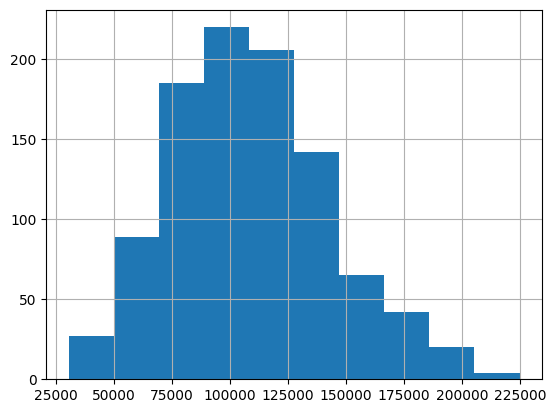

In [24]:
df.target.hist()

<Axes: >

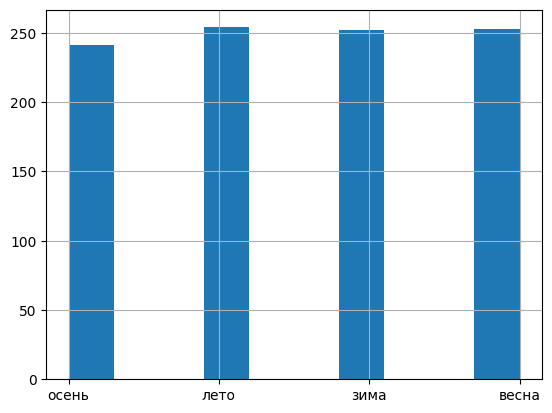

In [25]:
df.x1.hist()

<Axes: >

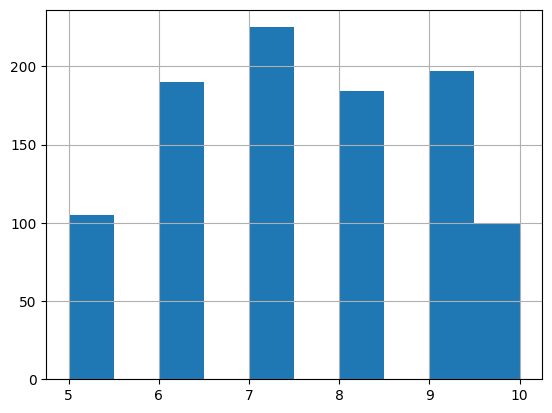

In [26]:
df.x2.hist()

<Axes: >

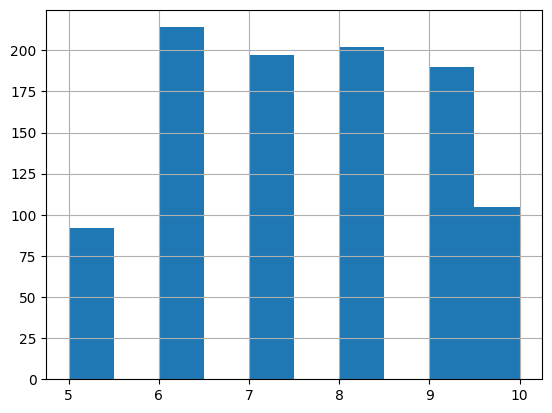

In [27]:
df.x3.hist()

<Axes: >

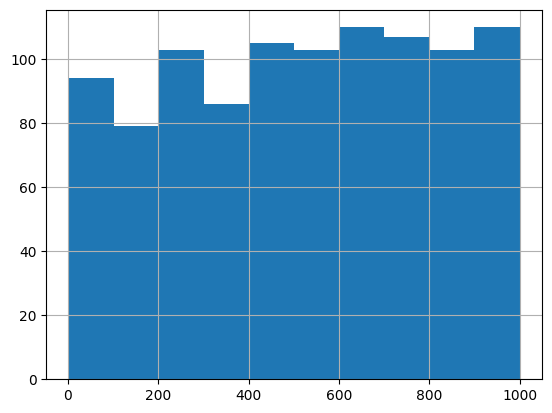

In [28]:
df.x4.hist()

<Axes: >

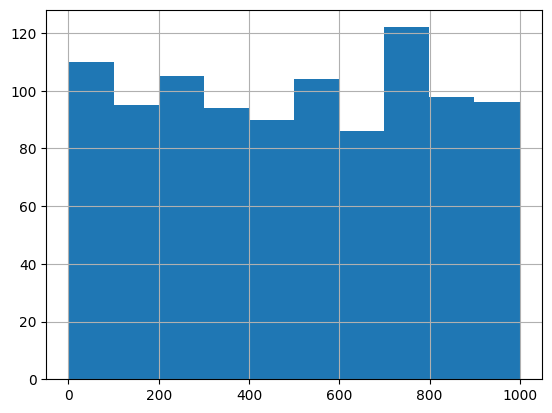

In [29]:
df.x5.hist()

Text(0, 0.5, 'target')

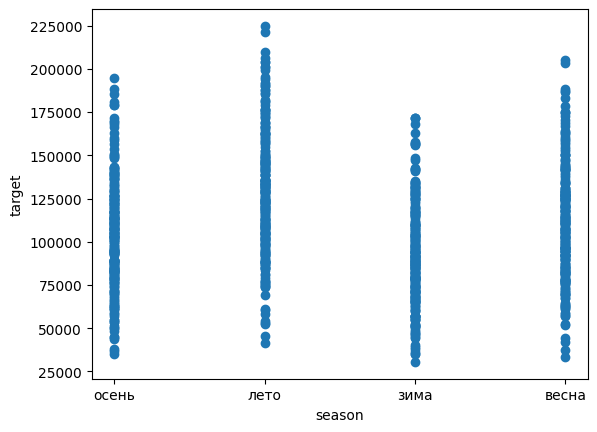

In [30]:
plt.plot(df.x1, df.target, "o")
plt.xlabel("season")
plt.ylabel("target")

Text(0, 0.5, 'target')

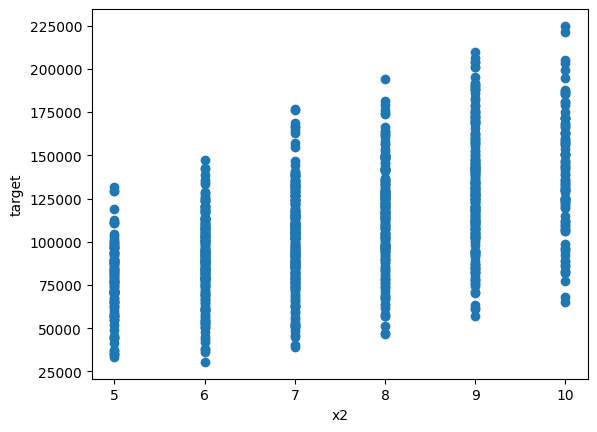

In [31]:
plt.plot(df.x2, df.target, "o")
plt.xlabel("x2")
plt.ylabel("target")

In [32]:
for col in df.columns:
    print(col, len(pd.unique(df[col])))
for col in df.columns:
    print(col, pd.unique(df[col]))

x1 4
x2 6
x3 6
x4 1000
x5 1000
target 681
x1 ['осень' 'лето' 'зима' 'весна']
x2 [ 6.  7. 10.  9.  8.  5.]
x3 [10.  5.  8.  7.  6.  9.]
x4 [684.85371393 787.43984196 934.33485383 507.94961196 154.83148
 483.55469765 837.10749459 192.57254886 921.29605164 245.96288357
 505.1046857  363.61667818 282.0490147  636.34602768 843.99600686
 630.99402057 284.33913421  67.84428059 165.58743668 237.45849497
 669.81437868 438.73247282 453.82640522 504.40504196 584.3780038
  84.0498499  488.04537706 546.31477    499.31429141 620.36479231
 962.22118843 794.77237023 959.98159    543.66361028 641.23148938
 123.8238079  383.12133611 966.14873137 250.41926255  50.97573797
 784.77691254 680.16198877 311.37926464 797.77489281 388.04318927
 482.97057564 961.06879902 104.39378645 966.55924491 460.06406308
 203.89975324  65.28087999 764.98469146 293.48752587 498.63950295
 686.54773405 592.04021995 533.65843385 697.36162164 987.52408257
 348.90355898 733.7770503  979.23670901 810.85950801 863.50593208
 811.044

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.x1 = le.fit_transform(df.x1)

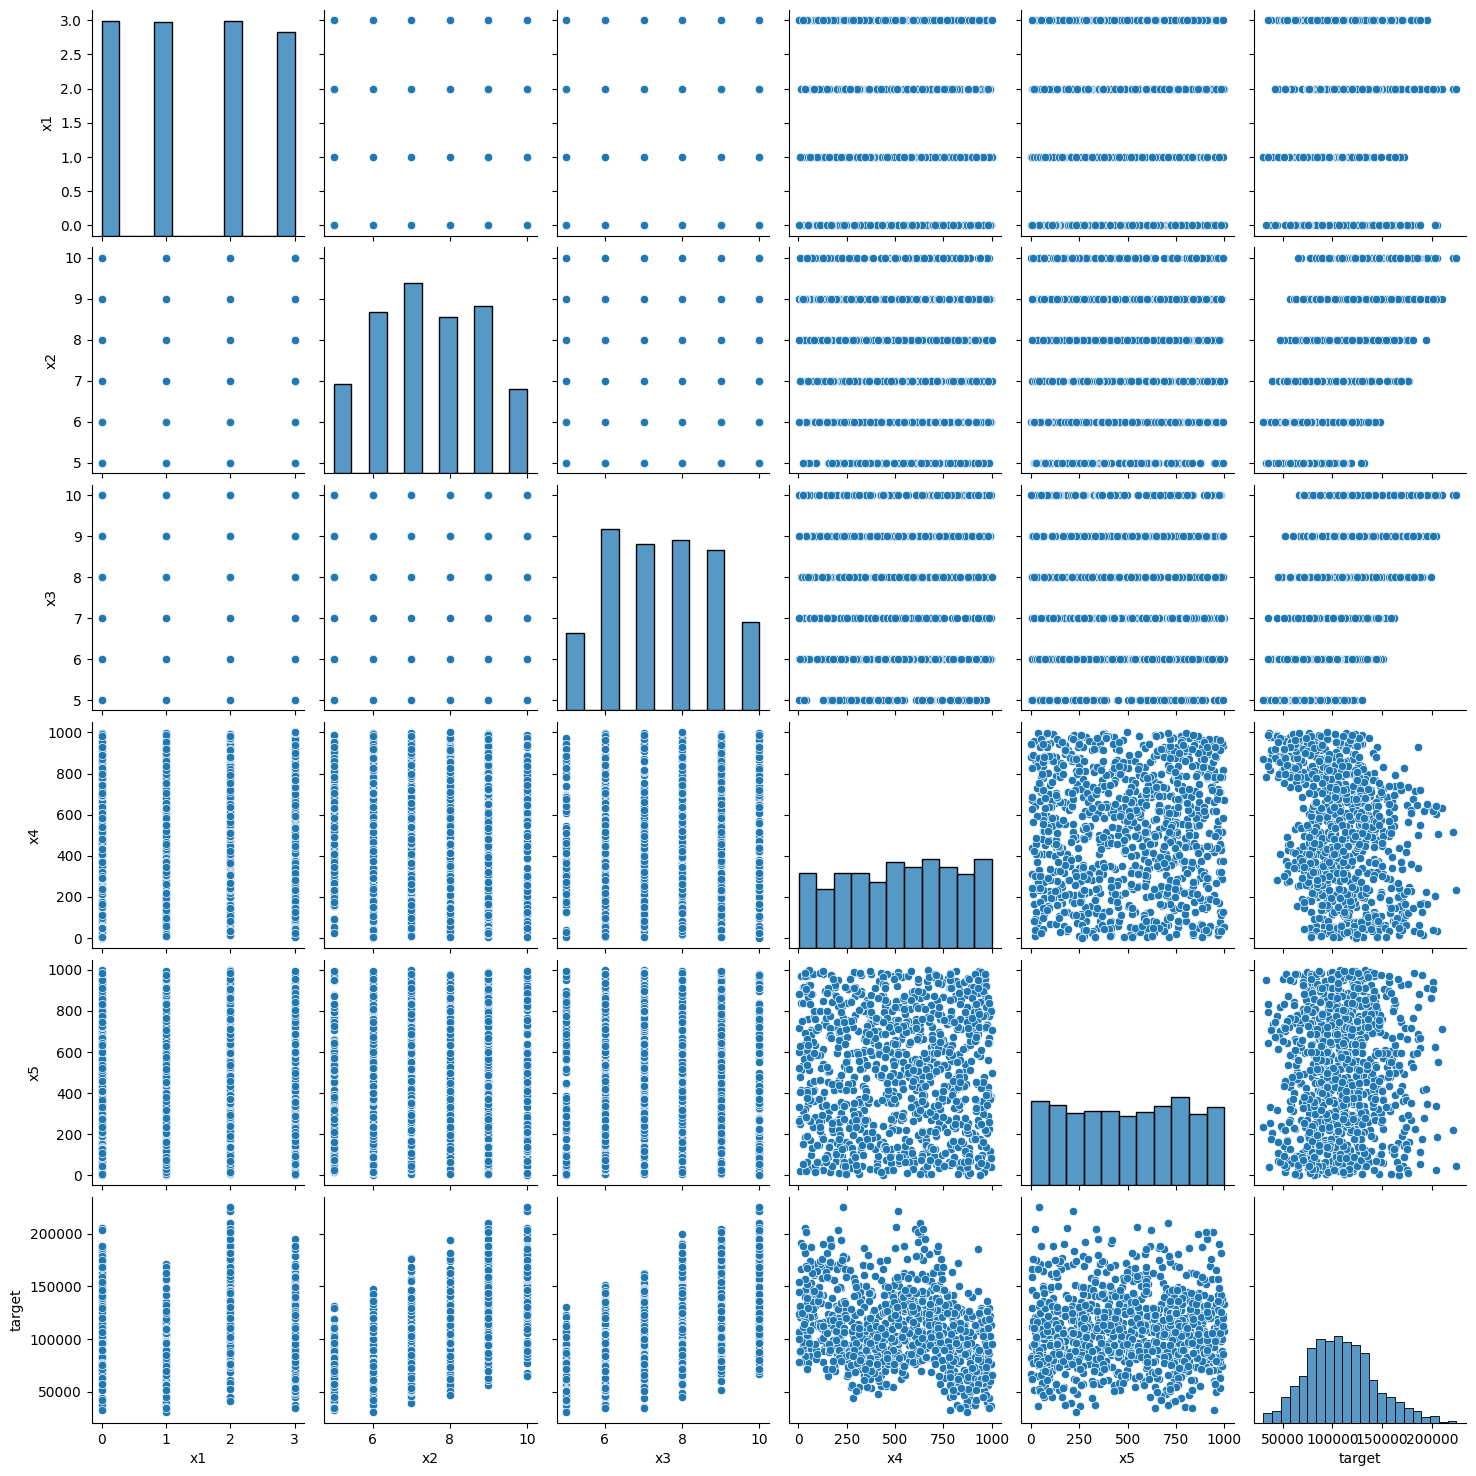

In [34]:
sns.pairplot(df)

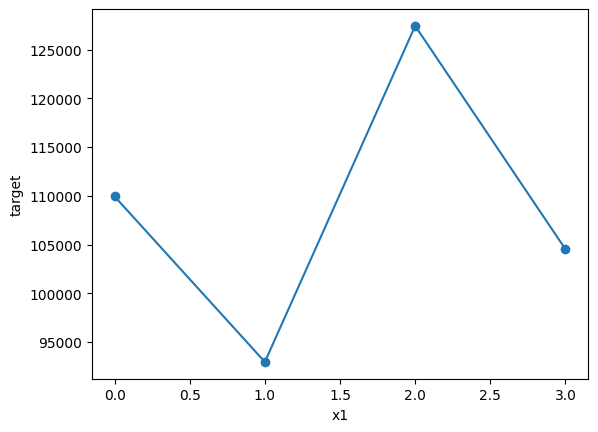

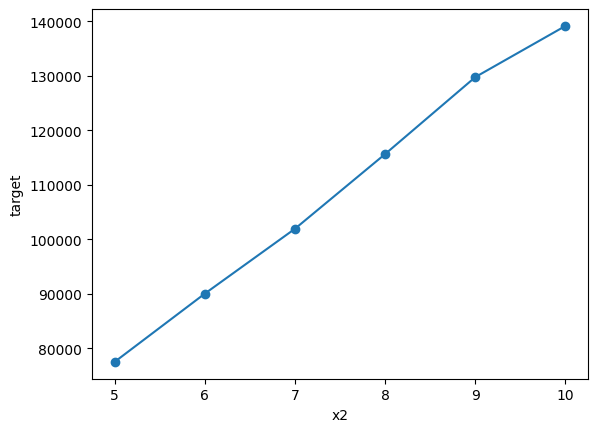

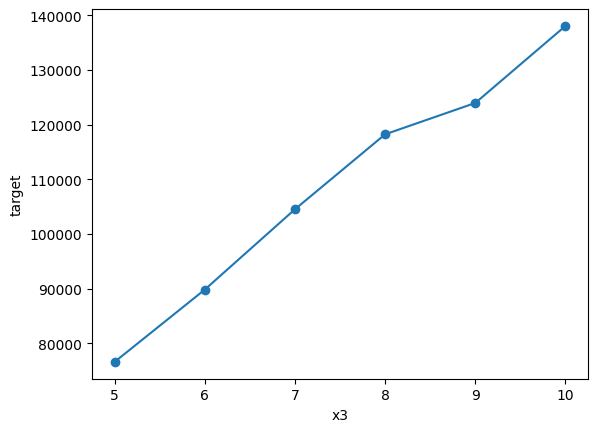

In [35]:
result1 = df.groupby('x1')['target'].mean().reset_index()
plt.plot(result1['x1'], result1['target'], "o-")
plt.xlabel("x1")
plt.ylabel("target")
plt.show()

result2 = df.groupby('x2')['target'].mean().reset_index()
plt.plot(result2['x2'], result2['target'], "o-")
plt.xlabel("x2")
plt.ylabel("target")
plt.show()

result3 = df.groupby('x3')['target'].mean().reset_index()
plt.plot(result3['x3'], result3['target'], "o-")
plt.xlabel("x3")
plt.ylabel("target")
plt.show()

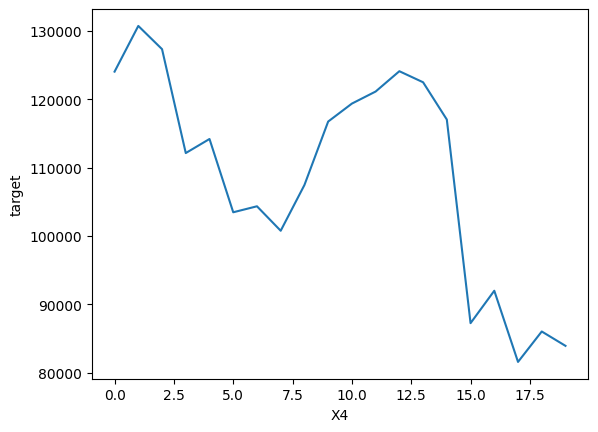

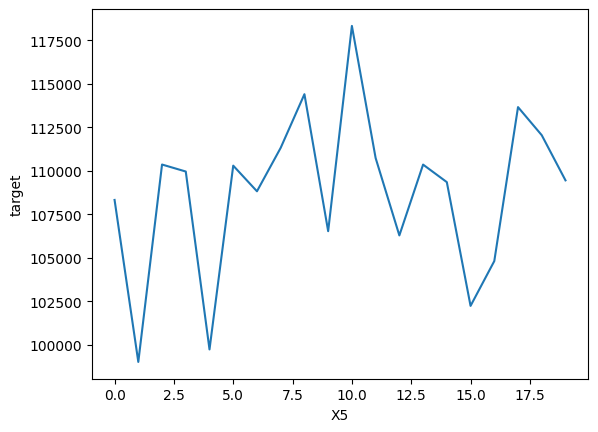

In [36]:
df_tmp = pd.read_csv("lab01.csv", index_col=0)
kb = KBinsDiscretizer(n_bins=20, encode='ordinal')
df_tmp["X4"] = kb.fit_transform(df_tmp[["x4"]])
result4 = df_tmp[["X4","target"]].groupby(by="X4").mean().reset_index()
plt.plot(result4.X4, result4.target)
plt.xlabel("X4")
plt.ylabel("target")
plt.show()

df_tmp["X5"] = kb.fit_transform(df_tmp[["x5"]])
result5 = df_tmp[["X5","target"]].groupby(by="X5").mean().reset_index()
plt.plot(result5.X5, result5.target)
plt.xlabel("X5")
plt.ylabel("target")
plt.show()

In [679]:
#sns.regplot(x='x4', y='target', data=df, line_kws={'color': 'red'})
#plt.show()

#sns.regplot(x='x5', y='target', data=df, line_kws={'color': 'red'})
#plt.show()

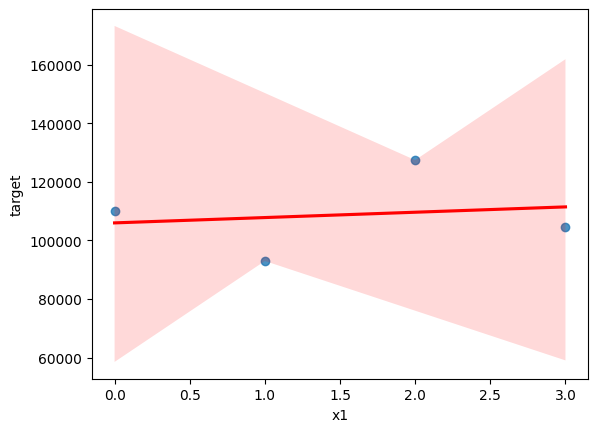

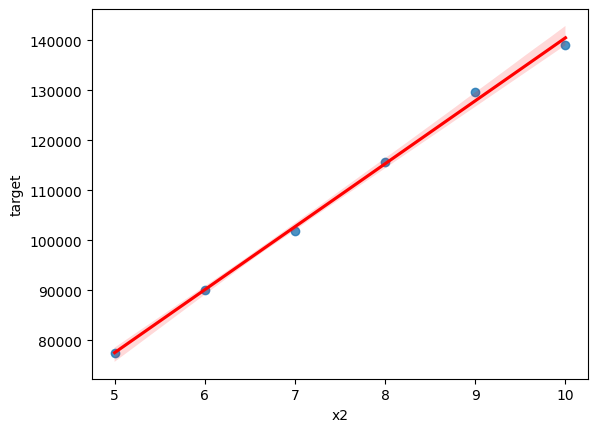

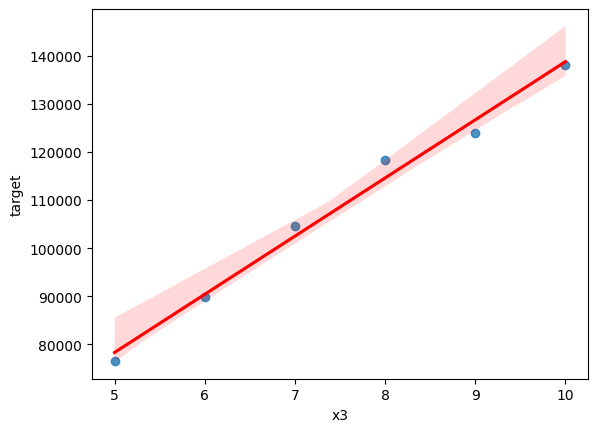

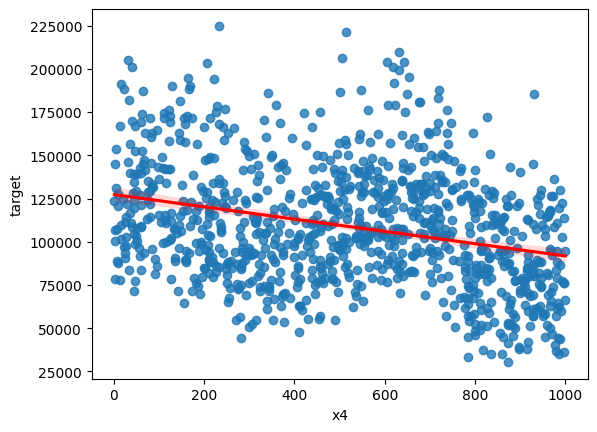

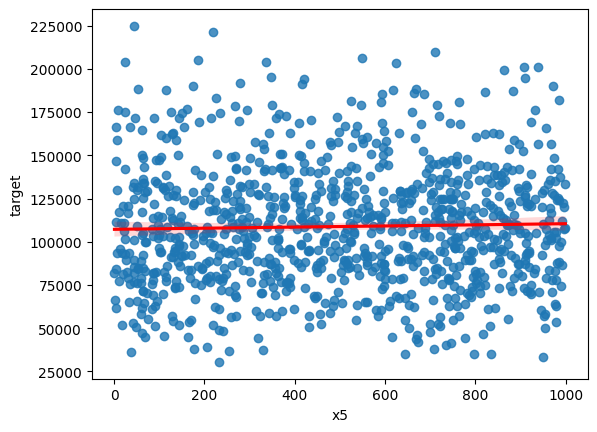

In [37]:
for col in df.columns:
    if col != 'target':
        mean_target_by_x = df.groupby(col)['target'].mean().reset_index()
        sns.regplot(x=col, y='target', data=mean_target_by_x, line_kws={'color': 'red'})
        plt.show()

<Axes: >

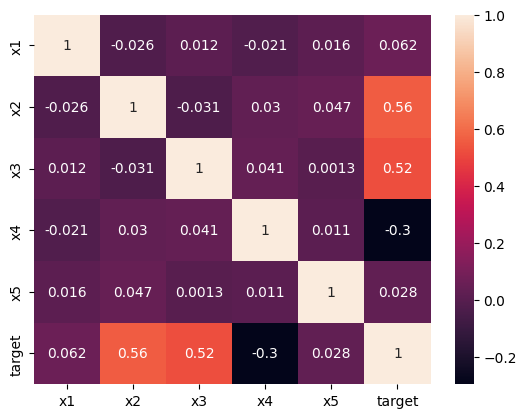

In [38]:
sns.heatmap(df.corr(), annot=True)

In [85]:
enc = OneHotEncoder(sparse_output=False)
df = pd.read_csv("lab01.csv", index_col=0)
season = enc.fit_transform(df[['x1']])
df = pd.concat([df, pd.DataFrame(season, columns=enc.get_feature_names_out())], axis = 1)
scaler = StandardScaler()
df[["x2", "x3", "x4", "x5"]] = scaler.fit_transform(df[["x2", "x3", "x4", "x5"]])
df

,x1,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень
0,осень,-0.983907,1.671051,0.571799,-0.031009,127000.0,0.0,0.0,0.0,1.0
1,лето,-0.983907,-1.669715,0.929230,-1.267749,54200.0,0.0,0.0,1.0,0.0
2,лето,-0.316852,0.334745,1.441043,1.706468,107600.0,0.0,0.0,1.0,0.0
3,зима,-0.316852,-0.333408,-0.044572,0.187977,91800.0,0.0,1.0,0.0,0.0
4,зима,1.684316,1.671051,-1.274910,-1.405957,171500.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,осень,0.350204,-1.669715,1.067394,-1.696031,61800.0,0.0,0.0,0.0,1.0
996,осень,-0.316852,-1.001562,1.121029,-1.145891,53800.0,0.0,0.0,0.0,1.0
997,осень,1.684316,-0.333408,-0.080454,0.482296,122800.0,0.0,0.0,0.0,1.0
998,осень,0.350204,-1.001562,-0.829444,-1.042871,84400.0,0.0,0.0,0.0,1.0


In [86]:
df.describe()

,x2,x3,x4,x5,target,x1_весна,x1_зима,x1_лето,x1_осень
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.486900e-16,2.371436e-16,-1.989520e-16,2.424727e-16,108796.100000,0.253000,0.252000,0.254000,0.241000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,34354.071039,0.434948,0.434379,0.435515,0.427904
min,-1.650963e+00,-1.669715e+00,-1.808709e+00,-1.708897e+00,30500.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.839074e-01,-1.001562e+00,-8.415976e-01,-8.727093e-01,84600.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.168516e-01,-3.334085e-01,5.318242e-02,3.870264e-02,106300.000000,0.000000,0.000000,0.000000,0.000000
75%,1.017260e+00,1.002898e+00,8.852319e-01,8.603034e-01,129450.000000,1.000000,1.000000,1.000000,0.000000
max,1.684316e+00,1.671051e+00,1.669668e+00,1.717194e+00,224800.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
for col in df.columns:
    print(col, len(pd.unique(df[col])))

x1 4
x2 6
x3 6
x4 1000
x5 1000
target 681
x1_весна 2
x1_зима 2
x1_лето 2
x1_осень 2


In [88]:
X = df.drop(["target", "x1"], axis =1)
#X = X.rename(str,axis="columns")
y = df.target

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Linear

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [97]:
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [98]:
from sklearn.model_selection import KFold
pred_test = np.zeros((X_test.shape[0], 5))
kf = KFold(n_splits=5)
scores = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_tr = X_train.iloc[train_index, :]
    y_tr = y_train.iloc[train_index]
    X_val = X_train.iloc[test_index, :]
    y_val = y_train.iloc[test_index]
    
    lr.fit(X_tr, y_tr)
    
    pred_tr = lr.predict(X_tr)[:]
    pred_val = lr.predict(X_val)[:]
    pred_test[:,i] = lr.predict(X_test)[:]
    
    score_tr = r2_score(y_tr, pred_tr)
    score_val = r2_score(y_val, pred_val)
    scores.append(score_val)
    print(score_tr, score_val)

0.8542814425537846 0.8313527488906857
0.8560289034062492 0.8206116371886942
0.8418140556683927 0.8801610892626419
0.8502931017144115 0.8528457512743918
0.8508524661552285 0.8499948871862577


In [99]:
# Обучаем новую модель на всех данных после подбора параметров 0.8567692867138251
lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)[:]
pred_test = lr.predict(X_test)[:]

score_train = r2_score(y_train, pred_train)
score_test = r2_score(y_test, pred_test)
scores.append(score_val)
print(score_train, score_test)

0.850850720592137 0.8567692867138251


In [100]:
# Доверительный интервал
from scipy.stats import bootstrap
bootstrap([scores], np.mean, confidence_level=0.9).confidence_interval.low

0.8362517537202333

In [94]:
# Усреднение моделей 0.8560535045254727
#pred_test.mean(axis=1)
score_test = r2_score(y_test, pred_test.mean(axis=1))
score_test

0.8560535045254727

In [95]:
for i in range(5):
    score_test = r2_score(y_test, pred_test[:,i])
    print(score_test)

0.8547720377743867
0.8539164597628812
0.8561598259794183
0.8571925966327172
0.856878054874187


# Polynomial

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [112]:
pf = PolynomialFeatures()
lr = LinearRegression()

model = make_pipeline(pf, lr)

param_grid = { 'polynomialfeatures__degree': np.arange(2,5)}

grid_s = GridSearchCV(model, param_grid=param_grid, cv=kf, n_jobs=-3, scoring='r2')
grid_s.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-3,
             param_grid={'polynomialfeatures__degree': array([2, 3, 4])},
             scoring='r2')

In [113]:
grid_s.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [114]:
# PolynomialFeatures(degree=3) 0.8943728669638829
test_r2_score = r2_score(y_test, grid_s.best_estimator_.predict(X_test))
test_r2_score

0.8943728669638829

# KBinsDiscretizer

In [115]:
from sklearn.preprocessing import KBinsDiscretizer

In [116]:
kb = KBinsDiscretizer(subsample=None)
lr = LinearRegression()

model = make_pipeline(kb, lr)

param_grid = {
    'kbinsdiscretizer__n_bins': np.arange(10, 210, 10),
    'kbinsdiscretizer__encode': ['ordinal', 'onehot'],
    'kbinsdiscretizer__strategy': ['uniform', 'quantile', 'kmeans']
}

grid_s = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-3, scoring='r2')
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kbinsdiscretizer',
                                        KBinsDiscretizer(subsample=None)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-3,
             param_grid={'kbinsdiscretizer__encode': ['ordinal', 'onehot'],
                         'kbinsdiscretizer__n_bins': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                         'kbinsdiscretizer__strategy': ['uniform', 'quantile',
                                                        'kmeans']},
             scoring='r2')

In [117]:
grid_s.best_estimator_

Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(n_bins=20, strategy='uniform',
                                  subsample=None)),
                ('linearregression', LinearRegression())])

In [118]:
grid_s.best_params_

{'kbinsdiscretizer__encode': 'onehot',
 'kbinsdiscretizer__n_bins': 20,
 'kbinsdiscretizer__strategy': 'uniform'}

In [119]:
# KBinsDiscretizer(n_bins=20, strategy='uniform', subsample=None) 0.951533090294542
test_r2_score = r2_score(y_test, grid_s.best_estimator_.predict(X_test))
test_r2_score

0.951533090294542